<a href="https://colab.research.google.com/github/R3gm/Colab-resources/blob/main/SAHI_inference_for_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov5.ipynb)

## 0. Preperation

- Install latest version of SAHI and YOLOv5:

In [ ]:
!pip install -U torch sahi yolov5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.0/101.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.3/956.3 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/

In [ ]:
import os
os.getcwd()

'/content'

- Import required modules:

In [ ]:
# arrange an instance segmentation model for test
from sahi.utils.yolov5 import (
    download_yolov5s6_model,
)

# import required functions, classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download a yolov5 model and two test images:

In [ ]:
# download YOLOV5S6 model to 'models/yolov5s6.pt'
yolov5_model_path = 'models/yolov5s6.pt'
download_yolov5s6_model(destination_path=yolov5_model_path)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv5 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [ ]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov5',
    model_path=yolov5_model_path,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [ ]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [ ]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

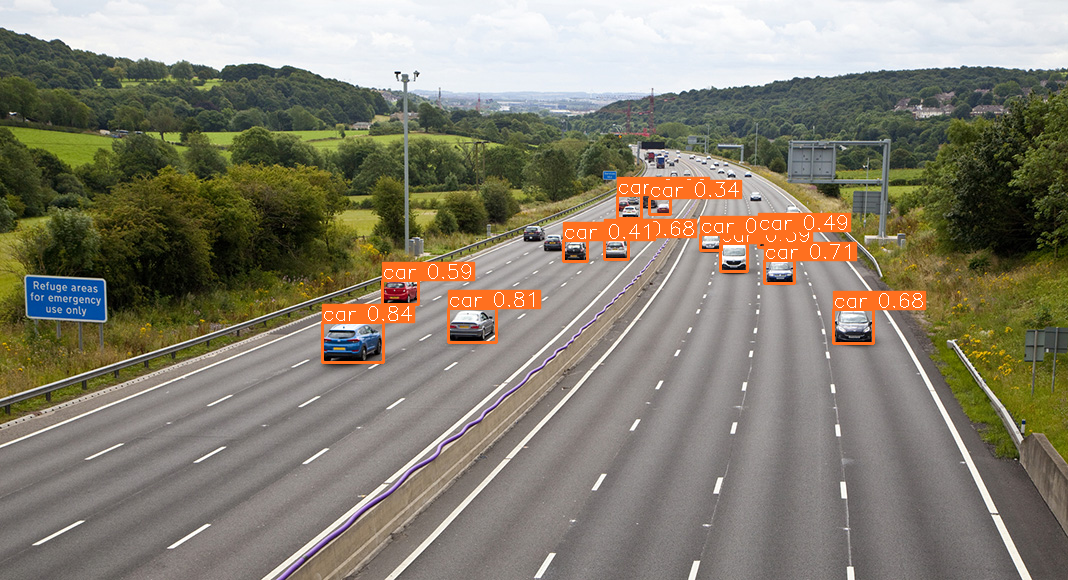

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv5 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [ ]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 number of slices.


- Visualize predicted bounding boxes and masks over the original image:

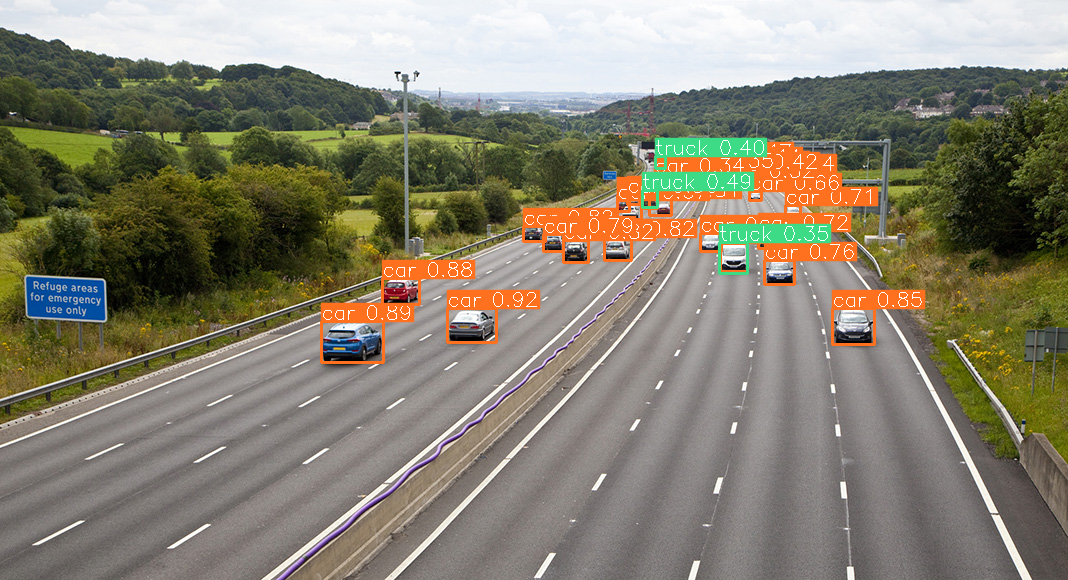

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [ ]:
object_prediction_list = result.object_prediction_list

In [ ]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(447.55752182006836, 308.252685546875, 496.90765380859375, 342.8026428222656), w: 49.35013198852539, h: 34.549957275390625>,
    mask: None,
    score: PredictionScore: <value: 0.9154329299926758>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [ ]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [447.55752182006836,
   308.252685546875,
   49.35013198852539,
   34.549957275390625],
  'score': 0.9154329299926758,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1705},
 {'image_id': None,
  'bbox': [321.43294525146484,
   321.90821838378906,
   62.17200469970703,
   40.92445373535156],
  'score': 0.8879777193069458,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2544},
 {'image_id': None,
  'bbox': [382.0502624511719,
   278.4272003173828,
   36.96442413330078,
   26.353561401367188],
  'score': 0.8796822428703308,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 974}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [ ]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [447.55752182006836,
   308.252685546875,
   49.35013198852539,
   34.549957275390625],
  'score': 0.9154329299926758,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1705},
 {'image_id': 1,
  'bbox': [321.43294525146484,
   321.90821838378906,
   62.17200469970703,
   40.92445373535156],
  'score': 0.8879777193069458,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2544},
 {'image_id': 1,
  'bbox': [382.0502624511719,
   278.4272003173828,
   36.96442413330078,
   26.353561401367188],
  'score': 0.8796822428703308,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 974}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [ ]:
!pip install -U imantics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for imantics: filename=imantics-0.1.12-py3-none-any.whl size=16030 sha256=7d6250dc2d15476dc53913f7b5db72ae587bebd67e6aa44e5a1bd1d82f09bebf
  Stored in directory: /root/.cache/pip/wheels/56/6a/be/4c60e88b14abec4e93234a1f7f91ce8abe1ae88a2b3eaad3ac
Successfully built imantics


In [ ]:
result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [ ]:
!pip install -U fiftyone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
result.to_fiftyone_detections()[:3]

Migrating database to v0.20.1


INFO:fiftyone.migrations.runner:Migrating database to v0.20.1


[<Detection: {
     'id': '645134fe5618e4d3d4e8625f',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.4190613500187906,
         0.5314701474946121,
         0.04620798875330093,
         0.059568891854121765,
     ],
     'mask': None,
     'confidence': 0.9154329299926758,
     'index': None,
 }>,
 <Detection: {
     'id': '645134fe5618e4d3d4e86260',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.3009671772017461,
         0.5550141696272225,
         0.05821348754654217,
         0.07055940299198546,
     ],
     'mask': None,
     'confidence': 0.8879777193069458,
     'index': None,
 }>,
 <Detection: {
     'id': '645134fe5618e4d3d4e86261',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.35772496484192123,
         0.4800468970989359,
         0.034610884019944554,
         0.04543717482994342,
     ],
     'mask': None,
     'confidence': 0

## 4. Batch Prediction

- Set model and directory parameters:

In [ ]:
model_type = "yolov5"
model_path = yolov5_model_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [ ]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]

Performing prediction on 15 number of slices.


Performing inference on images:  33%|███▎      | 1/3 [00:08<00:16,  8.29s/it]

Prediction time is: 8207.61 ms
Performing prediction on 15 number of slices.


Performing inference on images:  67%|██████▋   | 2/3 [00:14<00:07,  7.09s/it]

Prediction time is: 6164.96 ms
Performing prediction on 20 number of slices.


Performing inference on images: 100%|██████████| 3/3 [00:24<00:00,  8.27s/it]

Prediction time is: 10215.10 ms
Prediction results are successfully exported to runs/predict/exp


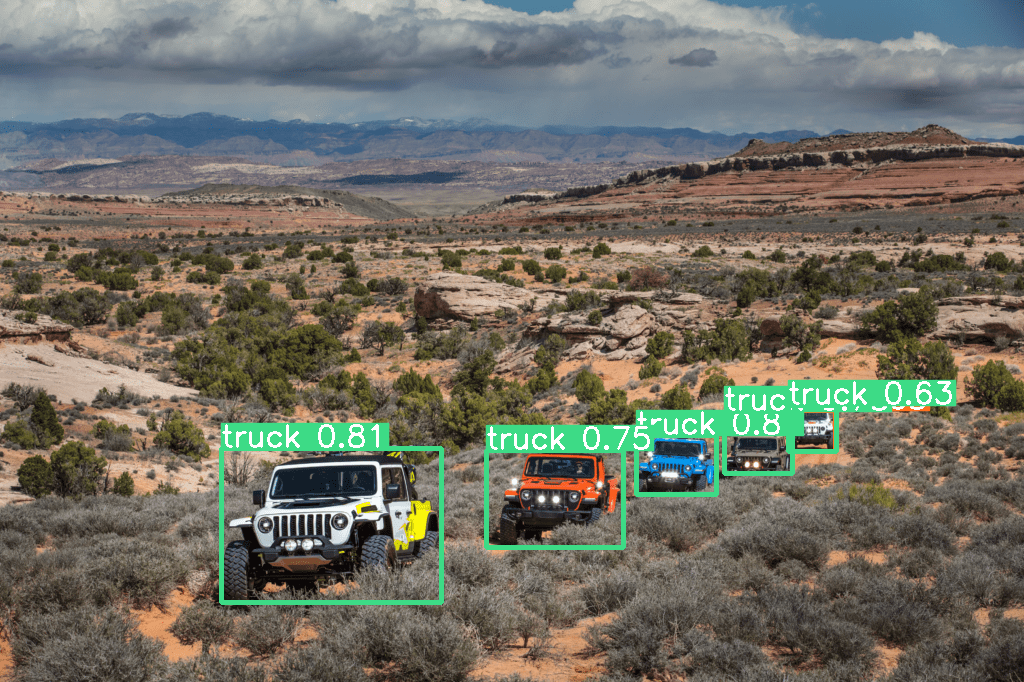

In [ ]:
Image("/content/runs/predict/exp/visuals/terrain2.png")

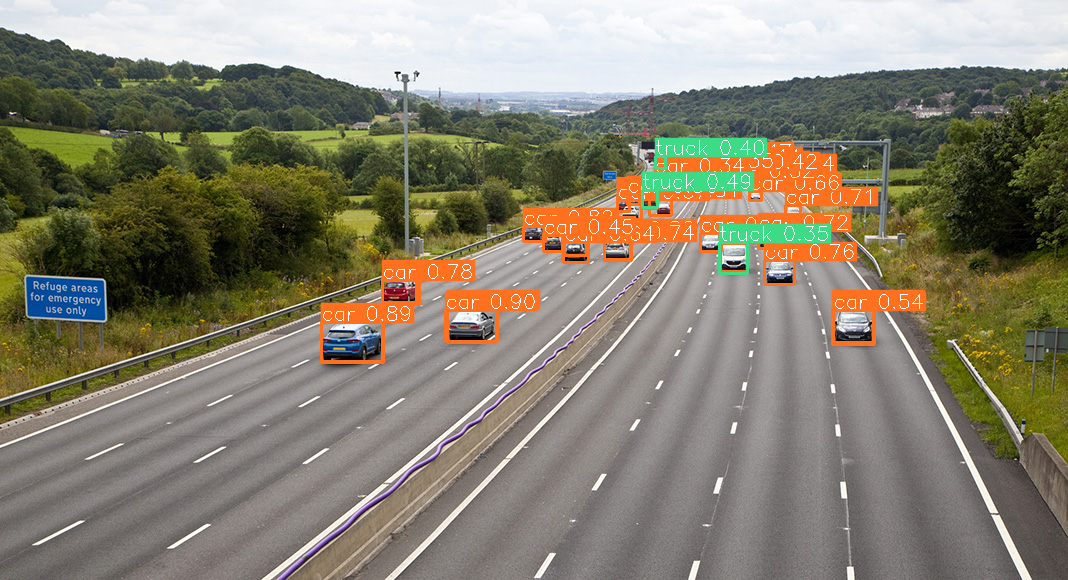

In [ ]:

Image("/content/runs/predict/exp/visuals/prediction_visual.png")

## log versions

In [ ]:
!pip freeze | sed 's/==/==/g' | sed 's/$/,/' | tr '\n' ' ' | sed 's/ $//' | sed 's/, /\n/g' > requirements.txt

In [ ]:
#@title Texto de título predeterminado
%%writefile requirements.txt
absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.6.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
attrs==23.1.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
blosc2==2.0.0
bokeh==2.4.3
branca==0.6.0
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cryptography==40.0.2
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.34
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
distributed==2022.12.1
dlib==19.24.1
dm-tree==0.1.8
docutils==0.16
dopamine-rl==4.0.6
duckdb==0.7.1
earthengine-api==0.1.350
easydict==1.10
ecos==2.0.12
editdistance==0.6.2
en-core-web-sm @ https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.5.0/en_core_web_sm-3.5.0-py3-none-any.whl#sha256=0964370218b7e1672a30ac50d72cdc6b16f7c867496f1d60925691188f4d2510
entrypoints==0.4
ephem==4.1.4
et-xmlfile==1.1.0
etils==1.2.0
etuples==0.3.8
exceptiongroup==1.1.1
fastai==2.7.12
fastcore==1.5.29
fastdownload==0.0.7
fastjsonschema==2.16.3
fastprogress==1.0.3
fastrlock==0.8.1
filelock==3.12.0
firebase-admin==5.3.0
Flask==2.2.4
flatbuffers==23.3.3
flax==0.6.9
folium==0.14.0
fonttools==4.39.3
frozendict==2.3.7
fsspec==2023.4.0
future==0.18.3
gast==0.4.0
GDAL==3.3.2
gdown==4.6.6
gensim==4.3.1
geographiclib==2.0
geopy==2.3.0
gin-config==0.5.0
glob2==0.7
google==2.0.3
google-api-core==2.11.0
google-api-python-client==2.84.0
google-auth==2.17.3
google-auth-httplib2==0.1.0
google-auth-oauthlib==1.0.0
google-cloud-bigquery==3.9.0
google-cloud-bigquery-storage==2.19.1
google-cloud-core==2.3.2
google-cloud-datastore==2.15.1
google-cloud-firestore==2.11.0
google-cloud-language==2.9.1
google-cloud-storage==2.8.0
google-cloud-translate==3.11.1
google-colab @ file:///colabtools/dist/google-colab-1.0.0.tar.gz#sha256=25f63225551aff4c9854d83d2d2e24b1e5480476a2bd6e51dfb8c4212677f69d
google-crc32c==1.5.0
google-pasta==0.2.0
google-resumable-media==2.5.0
googleapis-common-protos==1.59.0
googledrivedownloader==0.4
graphviz==0.20.1
greenlet==2.0.2
grpcio==1.54.0
grpcio-status==1.48.2
gspread==3.4.2
gspread-dataframe==3.0.8
gym==0.25.2
gym-notices==0.0.8
h5netcdf==1.1.0
h5py==3.8.0
hijri-converter==2.3.1
holidays==0.23
holoviews==1.15.4
html5lib==1.1
httpimport==1.3.0
httplib2==0.21.0
humanize==4.6.0
hyperopt==0.2.7
idna==3.4
imageio==2.25.1
imageio-ffmpeg==0.4.8
imagesize==1.4.1
imbalanced-learn==0.10.1
imgaug==0.4.0
importlib-metadata==6.6.0
importlib-resources==5.12.0
imutils==0.5.4
inflect==6.0.4
iniconfig==2.0.0
intel-openmp==2023.1.0
ipykernel==5.5.6
ipython==7.34.0
ipython-genutils==0.2.0
ipython-sql==0.4.1
ipywidgets==7.7.1
itsdangerous==2.1.2
jax==0.4.8
jaxlib @ https://storage.googleapis.com/jax-releases/cuda11/jaxlib-0.4.7+cuda11.cudnn86-cp310-cp310-manylinux2014_x86_64.whl#sha256=d8e211ffbd51c1c399b3d78d19c22d8f1d66a0b1b2f96408801069fa1999c17c
jieba==0.42.1
Jinja2==3.1.2
joblib==1.2.0
jsonpickle==3.0.1
jsonschema==4.3.3
jupyter-client==6.1.12
jupyter-console==6.1.0
jupyter-server==1.24.0
jupyter_core==5.3.0
jupyterlab-pygments==0.2.2
jupyterlab-widgets==3.0.7
kaggle==1.5.13
keras==2.12.0
keras-vis==0.4.1
kiwisolver==1.4.4
korean-lunar-calendar==0.3.1
langcodes==3.3.0
lazy_loader==0.2
libclang==16.0.0
librosa==0.10.0.post2
lightgbm==3.3.5
lit==16.0.2
llvmlite==0.39.1
locket==1.0.0
logical-unification==0.4.5
LunarCalendar==0.0.9
lxml==4.9.2
Markdown==3.4.3
markdown-it-py==2.2.0
MarkupSafe==2.1.2
matplotlib==3.7.1
matplotlib-inline==0.1.6
matplotlib-venn==0.11.9
mdurl==0.1.2
miniKanren==1.0.3
missingno==0.5.2
mistune==0.8.4
mizani==0.8.1
mkl==2019.0
ml-dtypes==0.1.0
mlxtend==0.14.0
more-itertools==9.1.0
moviepy==1.0.3
mpmath==1.3.0
msgpack==1.0.5
multipledispatch==0.6.0
multitasking==0.0.11
murmurhash==1.0.9
music21==8.1.0
natsort==8.3.1
nbclient==0.7.4
nbconvert==6.5.4
nbformat==5.8.0
nest-asyncio==1.5.6
networkx==3.1
nibabel==3.0.2
nltk==3.8.1
notebook==6.4.8
numba==0.56.4
numexpr==2.8.4
numpy==1.22.4
oauth2client==4.1.3
oauthlib==3.2.2
opencv-contrib-python==4.7.0.72
opencv-python==4.7.0.72
opencv-python-headless==4.7.0.72
openpyxl==3.0.10
opt-einsum==3.3.0
optax==0.1.5
orbax-checkpoint==0.2.1
osqp==0.6.2.post8
packaging==23.1
palettable==3.3.3
pandas==1.5.3
pandas-datareader==0.10.0
pandas-gbq==0.17.9
pandocfilters==1.5.0
panel==0.14.4
param==1.13.0
parso==0.8.3
partd==1.4.0
pathlib==1.0.1
pathy==0.10.1
patsy==0.5.3
pep517==0.13.0
pexpect==4.8.0
pickleshare==0.7.5
Pillow==8.4.0
pip-tools==6.6.2
platformdirs==3.3.0
plotly==5.13.1
plotnine==0.10.1
pluggy==1.0.0
polars==0.17.3
pooch==1.6.0
portpicker==1.3.9
prefetch-generator==1.0.3
preshed==3.0.8
prettytable==0.7.2
proglog==0.1.10
progressbar2==4.2.0
prometheus-client==0.16.0
promise==2.3
prompt-toolkit==3.0.38
prophet==1.1.2
proto-plus==1.22.2
protobuf==3.20.3
psutil==5.9.5
psycopg2==2.9.6
ptyprocess==0.7.0
py-cpuinfo==9.0.0
py4j==0.10.9.7
pyarrow==9.0.0
pyasn1==0.5.0
pyasn1-modules==0.3.0
pycocotools==2.0.6
pycparser==2.21
pyct==0.5.0
pydantic==1.10.7
pydata-google-auth==1.7.0
pydot==1.4.2
pydot-ng==2.0.0
pydotplus==2.0.2
PyDrive==1.3.1
pyerfa==2.0.0.3
pygame==2.3.0
Pygments==2.14.0
PyGObject==3.36.0
pymc==5.1.2
PyMeeus==0.5.12
pymystem3==0.2.0
PyOpenGL==3.1.6
pyparsing==3.0.9
pyrsistent==0.19.3
PySocks==1.7.1
pytensor==2.10.1
pytest==7.2.2
python-apt==0.0.0
python-dateutil==2.8.2
python-louvain==0.16
python-slugify==8.0.1
python-utils==3.5.2
pytz==2022.7.1
pytz-deprecation-shim==0.1.0.post0
pyviz-comms==2.2.1
PyWavelets==1.4.1
PyYAML==6.0
pyzmq==23.2.1
qdldl==0.1.7
qudida==0.0.4
regex==2022.10.31
requests==2.27.1
requests-oauthlib==1.3.1
requests-unixsocket==0.2.0
rich==13.3.4
rpy2==3.5.5
rsa==4.9
scikit-image==0.19.3
scikit-learn==1.2.2
scipy==1.10.1
scs==3.2.3
seaborn==0.12.2
Send2Trash==1.8.0
shapely==2.0.1
six==1.16.0
sklearn-pandas==2.2.0
smart-open==6.3.0
sniffio==1.3.0
snowballstemmer==2.2.0
sortedcontainers==2.4.0
soundfile==0.12.1
soupsieve==2.4.1
soxr==0.3.5
spacy==3.5.2
spacy-legacy==3.0.12
spacy-loggers==1.0.4
Sphinx==3.5.4
sphinxcontrib-applehelp==1.0.4
sphinxcontrib-devhelp==1.0.2
sphinxcontrib-htmlhelp==2.0.1
sphinxcontrib-jsmath==1.0.1
sphinxcontrib-qthelp==1.0.3
sphinxcontrib-serializinghtml==1.1.5
SQLAlchemy==2.0.10
sqlparse==0.4.4
srsly==2.4.6
statsmodels==0.13.5
sympy==1.11.1
tables==3.8.0
tabulate==0.8.10
tblib==1.7.0
tenacity==8.2.2
tensorboard==2.12.2
tensorboard-data-server==0.7.0
tensorboard-plugin-wit==1.8.1
tensorflow==2.12.0
tensorflow-datasets==4.8.3
tensorflow-estimator==2.12.0
tensorflow-gcs-config==2.12.0
tensorflow-hub==0.13.0
tensorflow-io-gcs-filesystem==0.32.0
tensorflow-metadata==1.13.1
tensorflow-probability==0.19.0
tensorstore==0.1.36
termcolor==2.3.0
terminado==0.17.1
text-unidecode==1.3
textblob==0.17.1
tf-slim==1.1.0
thinc==8.1.9
threadpoolctl==3.1.0
tifffile==2023.4.12
tinycss2==1.2.1
toml==0.10.2
tomli==2.0.1
toolz==0.12.0
torch @ https://download.pytorch.org/whl/cu118/torch-2.0.0%2Bcu118-cp310-cp310-linux_x86_64.whl#sha256=4b690e2b77f21073500c65d8bb9ea9656b8cb4e969f357370bbc992a3b074764
torchaudio @ https://download.pytorch.org/whl/cu118/torchaudio-2.0.1%2Bcu118-cp310-cp310-linux_x86_64.whl#sha256=19c4ef9012324c4fb80ea66934551b7807d97148c28538e2eabafe16ab50e91c
torchdata==0.6.0
torchsummary==1.5.1
torchtext==0.15.1
torchvision @ https://download.pytorch.org/whl/cu118/torchvision-0.15.1%2Bcu118-cp310-cp310-linux_x86_64.whl#sha256=9a679fa37a741018c804234693bbac3d487fb3dd55ee73f6b33677b177c8c07a
tornado==6.2
tqdm==4.65.0
traitlets==5.7.1
triton==2.0.0
tweepy==4.13.0
typer==0.7.0
typing_extensions==4.5.0
tzdata==2023.3
tzlocal==4.3
uritemplate==4.1.1
urllib3==1.26.15
vega-datasets==0.9.0
wasabi==1.1.1
wcwidth==0.2.6
webcolors==1.13
webencodings==0.5.1
websocket-client==1.5.1
Werkzeug==2.3.0
widgetsnbextension==3.6.4
wordcloud==1.8.2.2
wrapt==1.14.1
xarray==2022.12.0
xarray-einstats==0.5.1
xgboost==1.7.5
xlrd==2.0.1
yellowbrick==1.5
yfinance==0.2.18
zict==3.0.0
zipp==3.15.0,

Overwriting requirements.txt
